In [1]:
%load_ext autoreload
%autoreload 2
PROJ_HOME='/Users/keemsunguk/Projects/analyst_performance'
import sys
sys.path.append(PROJ_HOME)
import gc
import os

# Imports

In [2]:
import fastai

In [3]:
fastai.__version__

'2.4.1'

In [4]:
from pandas.api.types import is_string_dtype, is_numeric_dtype, is_categorical_dtype
from fastai.tabular.all import *

In [5]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from dtreeviz.trees import *
from IPython.display import Image, display_svg, SVG
from sklearn.tree import export_graphviz
from sklearn.model_selection import train_test_split

In [6]:
from fastbook import *

In [101]:
from arum.ml_utils import prf_analysis

In [7]:
os.environ["PATH"] += os.pathsep + '/Users/keemsunguk/fast_env/lib/python3.7/site-packages/graphviz/'

In [8]:
input_dir = Path(PROJ_HOME+'/data')
output_dir = Path(PROJ_HOME+'/data')

In [9]:
with open(output_dir/'label_1_sentiment.pkl', 'rb') as rf:
    aa_data_df = pd.read_pickle(rf)
    print(aa_data_df.shape)

(38742, 71)


In [10]:
#sentiment_df['__label1'] = sentiment_df.apply(lambda x: 1 if x.closing_1 <= x.closing else 0, axis=1)
#sentiment_df['__label2'] = sentiment_df.apply(lambda x: 1 if x.closing <= x.고가1 else 0, axis=1)
#sentiment_df['__label3'] = sentiment_df.apply(lambda x: 1 if x.closing_1 <= x.고가1 else 0, axis=1)

In [11]:
aa_data_df

,author,source,ticker_symbol,company,report_date,report_date-1,report_date-2,report_title,opening,closing,high,closing_1,closing_2,recommendation,고가1,고가2,고가3,고가4,고가5,고가6,고가7,고가8,고가9,고가10,고가11,고가12,고가13,고가14,고가15,고가16,고가17,고가18,고가19,고가20,고가21,고가22,고가23,고가24,고가25,고가26,고가27,고가28,고가29,고가30,고가31,고가32,고가33,고가34,고가35,고가36,고가37,고가38,고가39,고가40,고가41,고가42,고가43,고가44,고가45,고가46,고가47,고가48,고가49,고가50,H25,H50,en_report_title,sentiment,__label1,__label2,__label3
0,백영찬,KB,A078930,GS,2020-01-02 00:00:00,2019-12-30 00:00:00,NaN,4분기 실적은 기대수준을 소폭 하회할 전망,51300,50000,51400,51600,NaN,BUY,51400.0,50700.0,51100.0,50500.0,49250.0,49050.0,48600.0,48150.0,48700.0,48900.0,48350.0,48850.0,48900.0,48700.0,48800.0,48650.0,48050.0,46850.0,46700.0,46750.0,45850.0,45300.0,45250.0,47050.0,46550.0,45900.0,46700.0,46850.0,47100.0,46250.0,46450.0,46150.0,46100.0,45500.0,44650.0,43600.0,41750.0,42000.0,42000.0,41600.0,41500.0,41650.0,41100.0,41300.0,41000.0,39400.0,40450.0,40450.0,40550.0,36400.0,51400,51400,4Q09 earnings are expected to meet expectations,-0.100000,0,1,0
1,백영찬,KB,A010060,OCI,2020-01-02 00:00:00,2019-12-30 00:00:00,NaN,폴리실리콘 원가개선 필요한 시점,62700,62800,63200,62600,NaN,HOLD,63200.0,63400.0,63000.0,61900.0,61500.0,60100.0,62200.0,63300.0,64600.0,65400.0,64900.0,64800.0,65900.0,65200.0,65400.0,64700.0,61600.0,59700.0,59900.0,58000.0,54700.0,55600.0,55700.0,59600.0,59600.0,59300.0,67300.0,66600.0,66600.0,63900.0,63000.0,63200.0,62100.0,61200.0,58900.0,55400.0,54000.0,53200.0,54200.0,51500.0,49700.0,50900.0,50800.0,52200.0,52000.0,50100.0,48450.0,48200.0,46300.0,39150.0,65900,67300,Polysilicon cost improvement required,0.000000,1,1,1
2,백영찬,KB,A011780,금호석유,2020-01-02 00:00:00,2019-12-30 00:00:00,NaN,"견조한 고무사업, 그러나 부진한 페놀유도체",77300,76000,77400,77500,NaN,HOLD,77400.0,78100.0,77500.0,77500.0,76600.0,75300.0,74800.0,76500.0,80900.0,78300.0,78200.0,79300.0,80300.0,82100.0,80200.0,78500.0,75500.0,73600.0,73500.0,70700.0,67000.0,67400.0,68000.0,71100.0,70800.0,70400.0,70300.0,69800.0,69800.0,69000.0,68100.0,67600.0,68000.0,68000.0,66900.0,67400.0,66900.0,65500.0,64100.0,61400.0,61000.0,61100.0,62200.0,66100.0,65900.0,64200.0,62800.0,63200.0,63700.0,56300.0,82100,82100,"A solid rubber business, but sluggish phenol oil",0.000000,0,1,0
3,장정훈,삼성,A006400,삼성SDI,2020-01-02 00:00:00,2019-12-30 00:00:00,NaN,20년 연초에 꾸는 꿈,237000,232000,237500,236000,NaN,BUY,237500.0,235500.0,230500.0,233500.0,231000.0,233500.0,249500.0,261000.0,274500.0,270000.0,269000.0,273500.0,278500.0,277500.0,287000.0,291500.0,285500.0,291000.0,296500.0,290500.0,284500.0,309000.0,321000.0,319500.0,322500.0,321500.0,351000.0,343500.0,342500.0,340000.0,339000.0,338000.0,343500.0,347000.0,348000.0,329500.0,322500.0,317500.0,313500.0,303000.0,307500.0,318500.0,318000.0,324500.0,323500.0,305500.0,298000.0,301500.0,291500.0,284500.0,322500,351000,Dreams of 20 years,0.000000,0,1,1
4,백영찬,KB,A051910,LG화학,2020-01-02 00:00:00,2019-12-30 00:00:00,NaN,4분기 ESS 비용반영을 긍정적으로 보자,321000,314000,321000,317500,NaN,BUY,321000.0,318500.0,311000.0,313500.0,307000.0,307500.0,325500.0,335000.0,343000.0,333000.0,330000.0,333000.0,355000.0,359000.0,353000.0,354000.0,339500.0,339000.0,347500.0,354000.0,351500.0,385000.0,391500.0,385000.0,391500.0,390000.0,420000.0,412000.0,418000.0,420000.0,422500.0,422000.0,421500.0,422000.0,416500.0,400000.0,400500.0,398000.0,398000.0,380000.0,385000.0,398500.0,398500.0,412000.0,404000.0,385500.0,380000.0,377500.0,367000.0,343500.0,391500,422500,Let's see a positive reflection of ESS costs in 4Q,0.227273,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39795,김록호,하나금융,A009150,삼성전기,2021-09-10 00:00:00,9/9/21,9/8/21,호실적과 편안한 2022년,182500,188000,188000,181000,184000,BUY,188000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.

In [12]:
features_label1_df = aa_data_df[['author', 'source', 'ticker_symbol', 'company', 'report_date', 'recommendation', 'sentiment', '__label1']].copy()

In [13]:
features_label1_df['__label1'].value_counts()

1    22183
0    16559
Name: __label1, dtype: int64

In [14]:
features_label1_df = add_datepart(features_label1_df, "report_date")

In [16]:
features_label1_df

,author,source,ticker_symbol,company,recommendation,sentiment,__label1,report_Year,report_Month,report_Week,report_Day,report_Dayofweek,report_Dayofyear,report_Is_month_end,report_Is_month_start,report_Is_quarter_end,report_Is_quarter_start,report_Is_year_end,report_Is_year_start,report_Elapsed
0,백영찬,KB,A078930,GS,BUY,-0.100000,0,2020,1,1,2,3,2,False,False,False,False,False,False,1.577923e+09
1,백영찬,KB,A010060,OCI,HOLD,0.000000,1,2020,1,1,2,3,2,False,False,False,False,False,False,1.577923e+09
2,백영찬,KB,A011780,금호석유,HOLD,0.000000,0,2020,1,1,2,3,2,False,False,False,False,False,False,1.577923e+09
3,장정훈,삼성,A006400,삼성SDI,BUY,0.000000,0,2020,1,1,2,3,2,False,False,False,False,False,False,1.577923e+09
4,백영찬,KB,A051910,LG화학,BUY,0.227273,0,2020,1,1,2,3,2,False,False,False,False,False,False,1.577923e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39795,김록호,하나금융,A009150,삼성전기,BUY,0.400000,1,2021,9,36,10,4,253,False,False,False,False,False,False,1.631232e+09
39796,최정욱,하나금융,A316140,우리금융지주,BUY,0.800000,1,2021,9,36,10,4,253,False,False,False,False,False,False,1.631232e+09
39797,심은주,하나금융,A271560,오리온,BUY,0.000000,0,2021,9,36,10,4,253,False,False,False,False,False,False,1.631232e+09
39798,박강호,대신,A229640,LS전선아시아,BUY,-0.083333,1,2021,9,36,10,4,253,False,False,False,False,False,False,1.631232e+09


In [17]:
features_label1_df.drop(['report_Year', 'report_Elapsed'], axis=1, inplace=True)

In [30]:
features_label1_df.reset_index(inplace=True)

In [32]:
features_label1_df.drop(['index'], axis=1, inplace=True)

In [33]:
features_label1_df

,author,source,ticker_symbol,company,recommendation,sentiment,__label1,report_Month,report_Week,report_Day,report_Dayofweek,report_Dayofyear,report_Is_month_end,report_Is_month_start,report_Is_quarter_end,report_Is_quarter_start,report_Is_year_end,report_Is_year_start
0,백영찬,KB,A078930,GS,BUY,-0.100000,0,1,1,2,3,2,False,False,False,False,False,False
1,백영찬,KB,A010060,OCI,HOLD,0.000000,1,1,1,2,3,2,False,False,False,False,False,False
2,백영찬,KB,A011780,금호석유,HOLD,0.000000,0,1,1,2,3,2,False,False,False,False,False,False
3,장정훈,삼성,A006400,삼성SDI,BUY,0.000000,0,1,1,2,3,2,False,False,False,False,False,False
4,백영찬,KB,A051910,LG화학,BUY,0.227273,0,1,1,2,3,2,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38737,김록호,하나금융,A009150,삼성전기,BUY,0.400000,1,9,36,10,4,253,False,False,False,False,False,False
38738,최정욱,하나금융,A316140,우리금융지주,BUY,0.800000,1,9,36,10,4,253,False,False,False,False,False,False
38739,심은주,하나금융,A271560,오리온,BUY,0.000000,0,9,36,10,4,253,False,False,False,False,False,False
38740,박강호,대신,A229640,LS전선아시아,BUY,-0.083333,1,9,36,10,4,253,False,False,False,False,False,False


In [34]:
features_label1_df.columns.to_list()

['author',
 'source',
 'ticker_symbol',
 'company',
 'recommendation',
 'sentiment',
 '__label1',
 'report_Month',
 'report_Week',
 'report_Day',
 'report_Dayofweek',
 'report_Dayofyear',
 'report_Is_month_end',
 'report_Is_month_start',
 'report_Is_quarter_end',
 'report_Is_quarter_start',
 'report_Is_year_end',
 'report_Is_year_start']

In [35]:
cont,cat = cont_cat_split(features_label1_df, 1, dep_var='__label1')

In [36]:
cont

['sentiment',
 'report_Month',
 'report_Week',
 'report_Day',
 'report_Dayofweek',
 'report_Dayofyear']

In [37]:
cat

['author',
 'source',
 'ticker_symbol',
 'company',
 'recommendation',
 'report_Is_month_end',
 'report_Is_month_start',
 'report_Is_quarter_end',
 'report_Is_quarter_start',
 'report_Is_year_end',
 'report_Is_year_start']

In [38]:
'''Categorify is a TabularProc that replaces a column with a numeric categorical column. 
FillMissing is a TabularProc that replaces missing values with the median of the column, 
and creates a new Boolean column that is set to True for any row where the value was missing. 
'''
procs = [Categorify, FillMissing]

In [39]:
train_df, eval_df = train_test_split(features_label1_df, test_size=0.2)
splits = (list(train_df.index.to_list()), list(eval_df.index.to_list()))

In [40]:
train_df

,author,source,ticker_symbol,company,recommendation,sentiment,__label1,report_Month,report_Week,report_Day,report_Dayofweek,report_Dayofyear,report_Is_month_end,report_Is_month_start,report_Is_quarter_end,report_Is_quarter_start,report_Is_year_end,report_Is_year_start
13811,박종렬,현대차,A019680,대교,BUY,0.000000,0,7,31,29,2,211,False,False,False,False,False,False
29722,조윤호,DB금융,A034830,한국토지신탁,BUY,0.000000,0,4,16,23,4,113,False,False,False,False,False,False
31891,박종선,유진,A282880,코윈테크,BUY,-0.300000,1,5,20,17,0,137,False,False,False,False,False,False
14722,신은정,DB금융,A017670,SK텔레콤,BUY,0.000000,1,8,32,7,4,220,False,False,False,False,False,False
4469,이재일,유진,A012330,현대모비스,BUY,0.000000,0,3,11,11,2,71,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5575,조미진,NH,A097950,CJ제일제당,BUY,0.433333,0,4,14,1,2,92,False,True,False,True,False,False
9958,박경근,이베스트,A017960,한국카본,NR,0.000000,1,5,21,20,2,141,False,False,False,False,False,False
20837,김현,메리츠,A013030,하이록코리아,BUY,0.200000,1,11,46,13,4,318,False,False,False,False,False,False
20954,이수빈,대신,A074600,원익QnC,BUY,0.000000,1,11,47,16,0,321,False,False,False,False,False,False


In [41]:
to = TabularPandas(features_label1_df, procs, cat, cont, y_names='__label1', splits=splits)

In [42]:
len(to.train),len(to.valid)

(30993, 7749)

In [43]:
xs,y = to.train.xs,to.train.y
valid_xs,valid_y = to.valid.xs,to.valid.y

In [44]:
m = DecisionTreeRegressor(max_leaf_nodes=4)
m.fit(xs, y)

DecisionTreeRegressor(max_leaf_nodes=4)

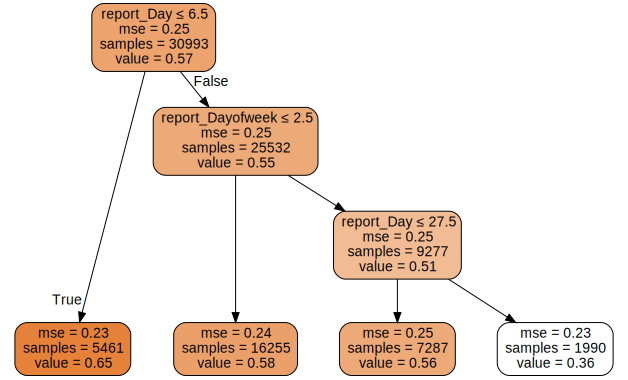

In [45]:
draw_tree(m, xs, size=10, leaves_parallel=True, precision=2)

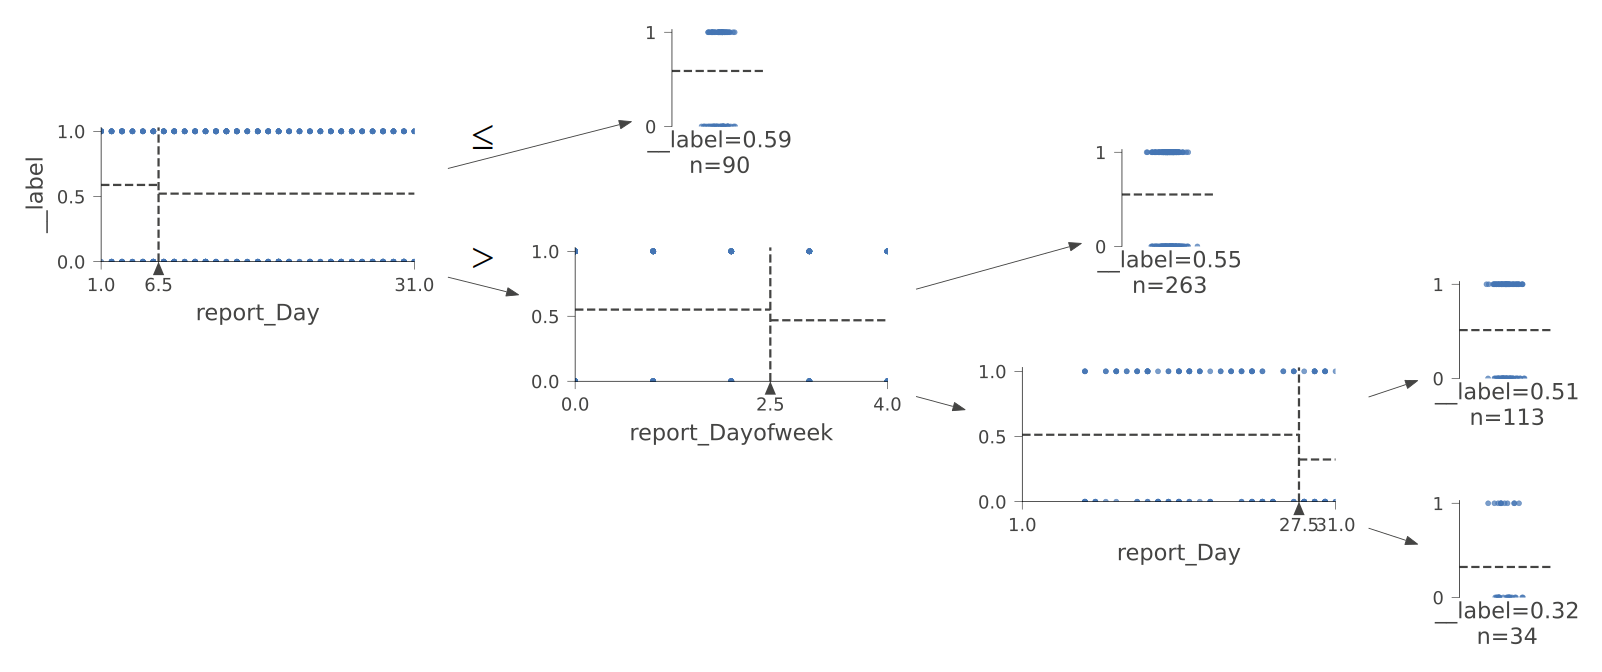

In [46]:
samp_idx = np.random.permutation(len(y))[:500]
dtreeviz(m, xs.iloc[samp_idx], y.iloc[samp_idx], xs.columns, '__label',
        fontname='DejaVu Sans', scale=3, label_fontsize=10,
        orientation='LR')

In [47]:
m = DecisionTreeRegressor()
m.fit(xs, y)

DecisionTreeRegressor()

In [48]:
def r_mse(pred,y): return round(math.sqrt(((pred-y)**2).mean()), 6)
def m_rmse(m, xs, y): return r_mse(m.predict(xs), y)

In [49]:
m_rmse(m, xs, y)

0.0

In [50]:
m_rmse(m, valid_xs, valid_y)

0.529062

In [51]:
m.get_n_leaves(), len(xs)

(6375, 30993)

In [52]:
m = DecisionTreeRegressor(min_samples_leaf=25)
m.fit(to.train.xs, to.train.y)
m_rmse(m, xs, y), m_rmse(m, valid_xs, valid_y)

(0.401449, 0.447132)

In [53]:
m.get_n_leaves()

934

In [56]:
def rf(xs, y, n_estimators=40, max_samples=30_000,
       max_features=0.5, min_samples_leaf=5, **kwargs):
    return RandomForestRegressor(n_jobs=-1, n_estimators=n_estimators,
        max_samples=max_samples, max_features=max_features,
        min_samples_leaf=min_samples_leaf, oob_score=True).fit(xs, y)

In [57]:
m = rf(xs, y);

In [58]:
m_rmse(m, xs, y), m_rmse(m, valid_xs, valid_y)

(0.30889, 0.404544)

In [59]:
preds = np.stack([t.predict(valid_xs) for t in m.estimators_])

In [60]:
r_mse(preds.mean(0), valid_y)

0.404544

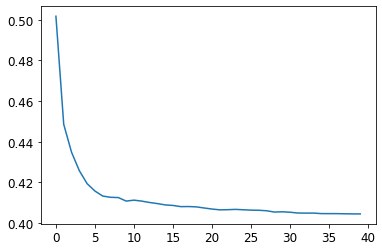

In [61]:
plt.plot([r_mse(preds[:i+1].mean(0), valid_y) for i in range(40)]);

In [106]:
pred_valid = [1 if x>0.5 else 0 for x in preds.squeeze()]

In [107]:
prf_analysis(valid_y, pred_valid)

Precision: 0.78
Recall   : 0.79
F1       : 0.79
F1       : 0.75


## Out Of Bag error
The OOB error is a way of measuring prediction error on the training set by only including in the calculation of a row's error trees where that row was not included in training. This allows us to see whether the model is overfitting, without needing a separate validation set.

In [62]:
r_mse(m.oob_prediction_, y)

0.412896

## Tree Variance for Prediction Confidence¶
how can we know the confidence of the estimate? One simple way is to use the standard deviation of predictions across the trees, instead of just the mean. This tells us the relative confidence of predictions

In [63]:
preds = np.stack([t.predict(valid_xs) for t in m.estimators_])
preds_std = preds.std(0)

In [64]:
preds_std[:20]

array([0.33630323, 0.30347839, 0.30008963, 0.20645841, 0.31057696, 0.27964482, 0.33189357, 0.33784363, 0.16834785, 0.31810579, 0.34946731, 0.27902412, 0.30432858, 0.31049308, 0.10541738, 0.22225601,
       0.3740971 , 0.39973276, 0.32771914, 0.31295307])

In [65]:
def rf_feat_importance(m, df):
    return pd.DataFrame({'cols':df.columns, 'imp':m.feature_importances_}
                       ).sort_values('imp', ascending=False)

In [66]:
fi = rf_feat_importance(m, xs)
fi[:10]

,cols,imp
2,ticker_symbol,0.192333
3,company,0.184188
16,report_Dayofyear,0.126361
14,report_Day,0.115129
0,author,0.104280
1,source,0.070977
13,report_Week,0.067945
15,report_Dayofweek,0.058389
11,sentiment,0.031523
12,report_Month,0.024764


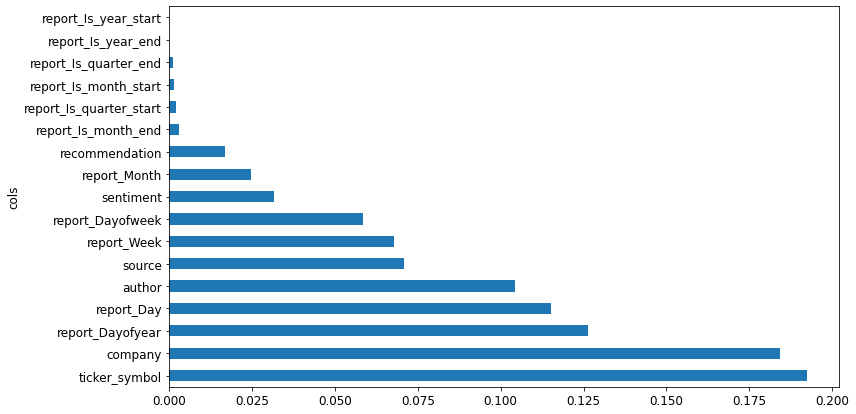

In [67]:
def plot_fi(fi):
    return fi.plot('cols', 'imp', 'barh', figsize=(12,7), legend=False)

plot_fi(fi);

## Removing Low-Importance Variables

In [68]:
to_keep = fi[fi.imp>0.007].cols
len(to_keep)

11

In [69]:
xs_imp = xs[to_keep]
valid_xs_imp = valid_xs[to_keep]
m = rf(xs_imp, y)
m_rmse(m, xs_imp, y), m_rmse(m, valid_xs_imp, valid_y)

(0.308681, 0.404276)

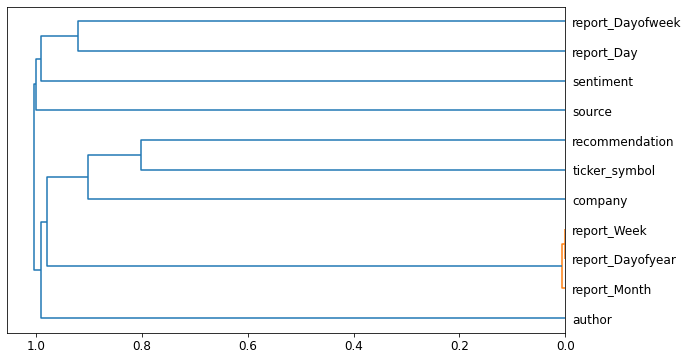

In [70]:
cluster_columns(xs_imp)

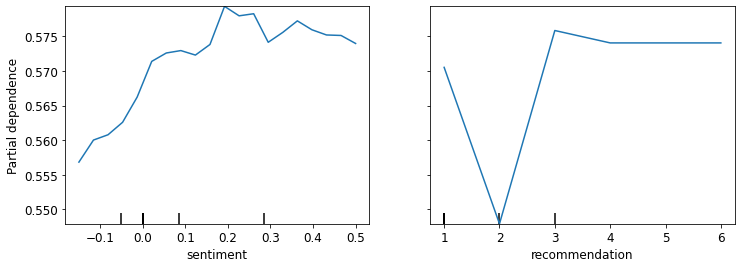

In [72]:
from sklearn.inspection import plot_partial_dependence

fig,ax = plt.subplots(figsize=(12, 4))
plot_partial_dependence(m, valid_xs_imp, ['sentiment','recommendation'],
                        grid_resolution=20, ax=ax);

## Tree Interpreter

In [76]:
#hide
import warnings
warnings.simplefilter('ignore', FutureWarning)

from treeinterpreter import treeinterpreter
from waterfall_chart import plot as waterfall

In [77]:
row = valid_xs_imp.iloc[:5]

In [78]:
prediction,bias,contributions = treeinterpreter.predict(m, row.values)

In [79]:
prediction[0], bias[0], contributions[0].sum()

(array([0.42097095]), 0.5700074999999999, -0.1490365484369432)

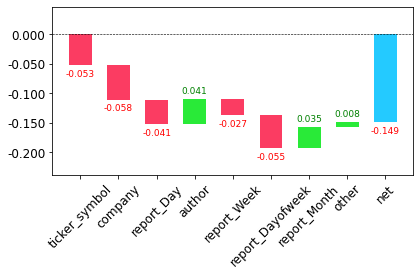

In [80]:
waterfall(valid_xs_imp.columns, contributions[0], threshold=0.08, rotation_value=45,formatting='{:,.3f}');

## Finding Out-of-Domain Data
know whether your test set is distributed in the same way as your training data, or, if it is different, what columns reflect that difference. 
* Put train and eval data together and run random forest
* Examine feature importance

## Neural Network

In [82]:
features_label1_df['__label1'] = features_label1_df['__label1'].astype(float)
print(type(features_label1_df.iloc[0]['__label1']))

<class 'numpy.float64'>


In [83]:
df_nn_final = features_label1_df[list(xs_imp.columns) + ['__label1']]

In [84]:
cont_nn,cat_nn = cont_cat_split(df_nn_final, max_card=9000, dep_var='__label1')

In [85]:
cont_nn

['sentiment']

In [86]:
df_nn_final[cat_nn].nunique()

ticker_symbol       1227
company             1229
report_Dayofyear     322
report_Day            31
author               479
source                35
report_Week           53
report_Dayofweek       5
report_Month          12
recommendation         6
dtype: int64

In [87]:
procs_nn = [Categorify, FillMissing, Normalize]
to_nn = TabularPandas(df_nn_final, procs_nn, cat_nn, cont_nn, splits=splits, y_names='__label1')

In [88]:
dls = to_nn.dataloaders(1024)

In [89]:
y = to_nn.train.y
y.min(),y.max()

(0.0, 1.0)

In [90]:
to_nn.train.xs

,ticker_symbol,company,report_Dayofyear,report_Day,author,source,report_Week,report_Dayofweek,report_Month,recommendation,sentiment
13811,235,221,206,29,164,34,31,3,7,1,-0.232854
29722,310,1128,110,23,419,2,16,5,4,1,-0.232854
31891,1059,986,132,17,165,23,20,1,5,1,-1.656889
14722,221,122,215,7,221,2,32,5,8,1,-0.232854
4469,192,1180,68,11,331,23,11,3,3,1,-0.232854
...,...,...,...,...,...,...,...,...,...,...,...
5575,662,11,89,1,412,8,14,3,4,1,1.824085
9958,226,1124,136,20,140,25,21,3,5,3,-0.232854
20837,199,1100,290,13,105,14,46,5,11,1,0.716502
20954,538,774,291,16,316,11,47,1,11,1,-0.232854


In [91]:
# Increase network size (layers)
learn = tabular_learner(dls, y_range=[0,1], layers=[500,250], n_out=1, loss_func=F.mse_loss)

In [92]:
dls.show_batch()

,ticker_symbol,company,report_Dayofyear,report_Day,author,source,report_Week,report_Dayofweek,report_Month,recommendation,sentiment,__label1
0,A017960,한국카본,136,15,엄경아,신영,20,4,5,BUY,-1.000000e-01,1.0
1,A139130,DGB금융지주,40,9,김재우,삼성,6,1,2,HOLD,2.477614e-10,1.0
2,A035420,NAVER,304,30,박지원,교보,44,4,10,BUY,2.477614e-10,0.0
3,A005490,POSCO,280,6,김윤상,하이,41,1,10,BUY,2.272727e-01,0.0
4,A139130,DGB금융지주,120,30,백두산,한국투자,17,4,4,BUY,2.477614e-10,1.0
5,A011780,금호석유,40,9,조현렬,삼성,6,1,2,BUY,2.477614e-10,1.0
6,A005440,현대그린푸드,223,11,서정연,신영,32,2,8,BUY,2.477614e-10,1.0
7,A031430,신세계인터내셔날,146,25,하누리,메리츠,22,0,5,BUY,2.477614e-10,0.0
8,A096240,청담러닝,335,30,김민철,교보,49,0,11,NR,2.477614e-10,1.0
9,A271560,오리온,84,24,심은주,하나금융,13,1,3,BUY,2.477614e-10,1.0


/Users/keemsunguk/Projects/fastai/fastai/callback/schedule.py:270: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "ro" (-> color='r'). The keyword argument will take precedence.
  ax.plot(val, idx, 'ro', label=nm, c=color)


SuggestedLRs(valley=tensor(0.0005))

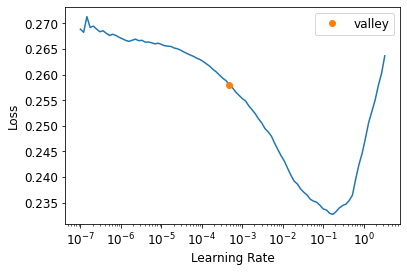

In [93]:
learn.lr_find()

In [94]:
learn.fit_one_cycle(5, 1e-3)

epoch,train_loss,valid_loss,time
0,0.240639,0.263741,00:01
1,0.209336,0.238634,00:01
2,0.173939,0.188177,00:01
3,0.132767,0.174176,00:01
4,0.098506,0.174698,00:01


In [95]:
preds,targs = learn.get_preds()
r_mse(preds,targs)

0.417969

In [110]:
preds_valid_nn = [1 if x > 0.5 else 0 for x in preds.squeeze()]

In [119]:
prf_analysis(list(to_nn.valid.y.values), preds_valid_nn)

Precision: 0.78
Recall   : 0.79
F1       : 0.79
Accuracy : 0.75


In [96]:
learn.save(input_dir/'nn')

Path('/Users/keemsunguk/Projects/analyst_performance/data/nn.pth')

In [97]:
tabular_learner??

Signature:
tabular_learner(
    dls,
    layers=None,
    emb_szs=None,
    config=None,
    n_out=None,
    y_range=None,
    loss_func=None,
    opt_func=<function Adam at 0x7fe8c28929e0>,
    lr=0.001,
    splitter=<function trainable_params at 0x7fe89068e950>,
    cbs=None,
    metrics=None,
    path=None,
    model_dir='models',
    wd=None,
    wd_bn_bias=False,
    train_bn=True,
    moms=(0.95, 0.85, 0.95),
)
Source:   
@delegates(Learner.__init__)
def tabular_learner(dls, layers=None, emb_szs=None, config=None, n_out=None, y_range=None, **kwargs):
    "Get a `Learner` using `dls`, with `metrics`, including a `TabularModel` created using the remaining params."
    if config is None: config = tabular_config()
    if layers is None: layers = [200,100]
    to = dls.train_ds
    emb_szs = get_emb_sz(dls.train_ds, {} if emb_szs is None else emb_szs)
    if n_out is None: n_out = get_c(dls)
    assert n_out, "`n_out` is not defined, and could not be inferred from data, set `dls.c` or

In [245]:
get_emb_sz(dls.train_ds)  # 1.6 * n_cat**0.56

[(19, 8),
 (46, 14),
 (19, 8),
 (137, 25),
 (25, 10),
 (32, 11),
 (22, 9),
 (6, 4),
 (8, 5)]

In [260]:
emb_mx = to_np(next(learn.model.embeds[0].parameters()))

In [262]:
emb_mx.shape

(19, 8)

# Ensembling
One minor issue we have to be aware of is that our PyTorch model and our sklearn model create data of different types: PyTorch gives us a rank-2 tensor (i.e, a column matrix), whereas NumPy gives us a rank-1 array (a vector). squeeze removes any unit axes from a tensor, and to_np converts it into a NumPy array:

In [98]:
rf_preds = m.predict(valid_xs_imp)
ens_preds = (to_np(preds.squeeze()) + rf_preds) /2

In [99]:
r_mse(ens_preds,valid_y)

0.394459

# Boosting Algo
* Train a small model that underfits your dataset.
* Calculate the predictions in the training set for this model.
* Subtract the predictions from the targets; these are called the "residuals" and represent the error for each point in the training set.
* Go back to step 1, but instead of using the original targets, use the residuals as the targets for the training.
* Continue doing this until you reach some stopping criterion, such as a maximum number of trees, or you observe your validation set error getting worse.